# Ising Model

In [2]:
%pylab notebook
import time 

Populating the interactive namespace from numpy and matplotlib


In [5]:
%matplotlib inline 

In [6]:
class ising_lattice2D():
    '''2 dimensional lattice occupied by spins pointing upwards or downwards'''
    # initialize functi
    def __init__(self,N_=1,J_=1,B_=0):
        self.N=N_
        self.J=J_
        self.B=B_
        self.E=0
        self.M=0
        self.lattice=np.zeros((N_,N_),dtype=np.int)
    def createLattice(self):
        '''creates a lattice of 2-dimensionallattice of size  NxN
        with random number of -1,1'''
        self.lattice=np.array([ (i<0.5)*2-1  for i in np.random.random((self.N,self.N)) ])
    def plotConfig(self):
        ''' plot the configs using a simple colormesh plot '''
        figure()
        pcolormesh(self.lattice)
        xlabel('Y')
        ylabel('X')
        title('Ising spin lattice')
        show()
    '''
    def refold(self,x):
        folds back the position for the periodic 
        boundary conditions
        return x % self.N;
    '''
    def refold(self, idx):
        if ( idx < 0 ):
            return (self.N-1)
        elif ( idx == self.N ):
            return 0
        else:
            return idx
    
    def singleSpinEnergy(self,x,y):
        '''return the energy of a single spin on the lattice'''
        sumSpin=(  self.lattice[self.refold(x-1)][y] 
                 + self.lattice[self.refold(x+1)][y]
                 + self.lattice[x][self.refold(y-1)] 
                 + self.lattice[x][self.refold(y+1)] 
                )
        return -1.0*self.lattice[x][y]*(self.J*0.5*sumSpin+self.B)

    def getEnergy(self):
        '''calculates the energy associated 
        with the current configuration of the lattice '''
        self.E=0
        for idx,s in ndenumerate(self.lattice):
            self.E+=self.singleSpinEnergy(idx[0],idx[1])
        self.E/=(2*self.lattice.size)
        #self.E/=(2)
        return self.E
        
    def getMagnetization(self):
        '''calculates the magnetization of the lattice '''
        return float(self.lattice.sum())/self.lattice.size
        #return float(self.lattice.sum())
    def MCStep(self,time, temp):
        '''Monte-Carlo step'''
        # introduce counter to check for frozen states
        counter = 0
        # check if lattice was initialised
        if self.lattice[0,0] == 0:
            self.createLattice()
        for t in range(time):
            for i in range(self.lattice.size) : 
                #draw a random position on the lattice
                x = np.random.randint(0,self.N)
                y = np.random.randint(0,self.N)
                #calculate the energy of the spin
                e0=self.singleSpinEnergy(x,y)
                #e1=e0*(-1.0)
                #p=exp( -(e1-e0)/T)= exp(2*e0/temp)
                p=np.exp(2*e0/temp)
                # apply metropolis 
                if (e0 > 0):
                    self.lattice[x][y] *= -1
                    counter += 1
                elif (np.random.random_sample() < p):
                    self.lattice[x][y] *= -1
                    counter += 1
        return counter


0.025


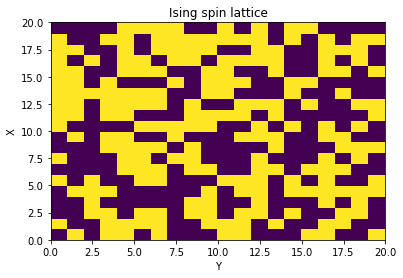

In [7]:
maggi=ising_lattice2D(20)
maggi.createLattice()
print (maggi.getMagnetization())
maggi.plotConfig()

## Simple Sampling

In [5]:
#create a instance on lattice 
maggi=ising_lattice2D(20)
#dimensionless temperature T kB=1
T=np.array([4,3,2.5,2.27,2.2,2.1,2,1.5,1.,0.5])
#T=np.array([4,3,2.5,2.27,2.2,2.1,2,1.5,1.3,1.2,1.0,0.9,0.8,0.6,0.5])
nConfigs=10000
avEnergy=np.zeros(T.size)
avMagnetization=np.zeros(T.size)
normalization = np.zeros(T.size)
mag= np.zeros(nConfigs)
energy= np.zeros(nConfigs)
for i in arange(0,nConfigs):
    if(i %100 == 0 ) : 
        print (i)
    maggi.createLattice()
    E=maggi.getEnergy()
    M=maggi.getMagnetization()
    mag[i]=M
    energy[i]=E
    # calculate boltzmann factor
    expE = np.exp(-1.0*E/T)
    avMagnetization+=M*expE
    avEnergy+=expE*E
    normalization += expE
#normalization 
avMagnetization/=normalization
avEnergy/=normalization
print(avMagnetization,"\n",avEnergy)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
[-0.00023952 -0.00023952 -0.00023952 -0.00023952 -0.00023952 -0.00023951
 -0.00023951 -0.0002395  -0.00023945 -0.00023915] 
 [-0.000677   -0.00078066 -0.00086358 -0.00091399 -0.00093142 -0.00095835
 -0.00098796 -0.00119524 -0.00160976 -0.00285293]


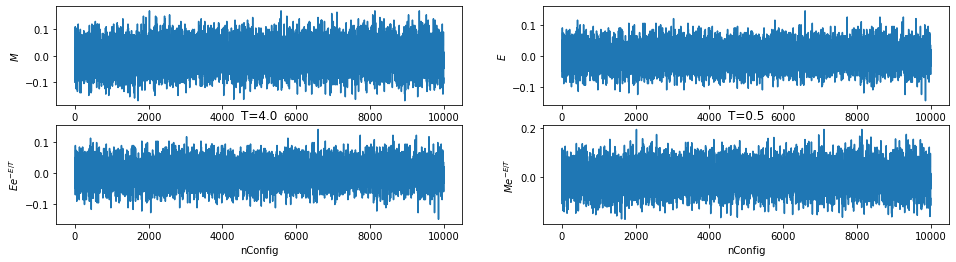

In [9]:
figure(figsize=(16,4))
x=arange(0,nConfigs)

subplot(221)
xlabel('nConfig')
ylabel('$M$')
plot(x,mag)

subplot(222)
xlabel('nConfig')
ylabel('$E$')
plot(x,energy)

subplot(223)
xlabel('nConfig')
ylabel('$Ee^{-E/T}$')
title("T="+str(T[0]))
plot(x,energy*exp(-energy/T[0]))

subplot(224)
title("T="+str(T[T.size-1]))
xlabel('nConfig')
ylabel('$Me^{-E/T}$')
plot(x,mag*exp(-energy/T[T.size-1]))



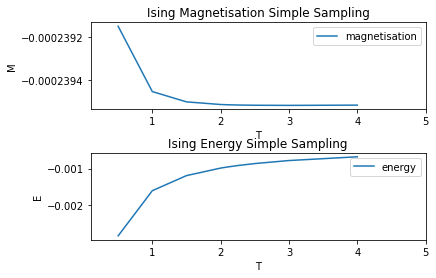

In [10]:
figure()

# subplot magnetisation
subplot(211)
plot(T,avMagnetization, label="magnetisation")
#plot(tempertatures,meanE/normalization, label="energy")
xlabel("T")
ylabel("M")
xlim(0.1,5)
legend(loc="best")
title("Ising Magnetisation Simple Sampling")

# subplot energy
subplot(212)
plot(T,avEnergy, label="energy")
#plot(tempertatures,meanE/normalization, label="energy")
xlabel("T")
ylabel("E")
xlim(0.1,5)
legend(loc="best")
title("Ising Energy Simple Sampling")

# adjust plot spacing
subplots_adjust(hspace=.5)

show()

The second order phase transition is not visible. The reason is the sampling method. Simple sampling is only effective for flat energy landscapes!

# Importance Sampling

In [8]:
#create an instance of the lattice 
start=time.process_time()
mary= ising_lattice2D(20)
nConfigs=20
t_sim=100
M_t=zeros((nConfigs,t_sim))
temp=0.5
for i in range(nConfigs):
    mary.createLattice()
    for t in range(t_sim):
        nFlips=mary.MCStep(1,temp )
        #if ( nFlips == 0 ) : 
        #    print("No spin gets flipped!")
        #mary.plotConfig()
        M_t[i,t]=mary.getMagnetization()
print("Execution time={0:.1f}s".format(time.process_time()-start))

Execution time=30.0s


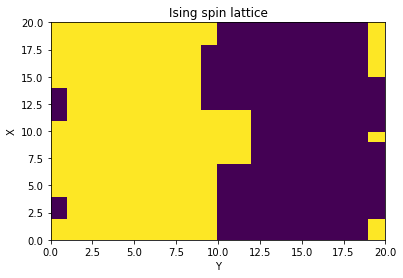

In [8]:
mary.plotConfig()

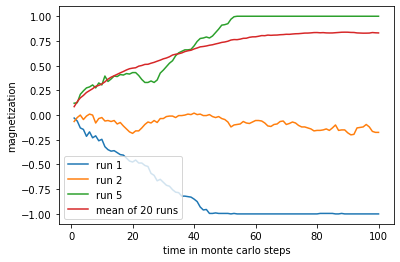

In [9]:
figure()
x = np.linspace(1,t_sim,t_sim)
xlabel('time in monte carlo steps')
ylabel('magnetization')
plot(x,M_t[0,:], label= "run 1")
plot(x,M_t[1,:], label= "run 2")
plot(x,M_t[4,:], label= "run 5")
plot(x,np.sum(np.abs(M_t), axis = 0)/M_t.shape[0], label="mean of {} runs".format(M_t.shape[0]))
legend(loc="best")
show()

Metropolis criterion pushes the magnetization to the equilibrium value. 

In [18]:
start= time.process_time()
# run simulations for <M>, <E> and <C> = <E^2> - <E>^2

ising = ising_lattice2D(20)

#temp = np.array([10,4,3,2.5,2.27,2.2,2.1,2,1.5,1,0.5,0.1])
temp = np.array([4,2.5,2.2,2,1.5,1.25,1,0.5,0.1])
meanE = np.zeros(temp.size)
meanM = np.zeros(temp.size)
meanC = np.zeros(temp.size)

n_samples = 5
n_iter = 200
n_steps = 20

for i,T in enumerate(temp):
    Esquared = 0
    E = 0
    M = 0
    for n in range(n_samples):
        print("T="+str(T)+" Sample="+str(n))
        ising.createLattice()
        for it in range(n_iter):
            ising.MCStep(n_steps,T)
            if (n_iter > 10):
                M += np.abs(ising.getMagnetization())
                thisE = ising.getEnergy()
                E += thisE
                Esquared += (thisE*thisE)
            
    meanE[i] = E/(n_samples*n_iter)
    meanM[i] = M/(n_samples*n_iter)
    meanC[i] = (Esquared/(n_samples*n_samples) - E*E/(n_iter*n_iter) )
print(time.process_time()-start)

T=4.0 Sample=0
T=4.0 Sample=1
T=4.0 Sample=2
T=4.0 Sample=3
T=4.0 Sample=4
T=2.5 Sample=0
T=2.5 Sample=1
T=2.5 Sample=2
T=2.5 Sample=3
T=2.5 Sample=4
T=2.2 Sample=0
T=2.2 Sample=1
T=2.2 Sample=2
T=2.2 Sample=3
T=2.2 Sample=4
T=2.0 Sample=0
T=2.0 Sample=1
T=2.0 Sample=2
T=2.0 Sample=3
T=2.0 Sample=4
T=1.5 Sample=0
T=1.5 Sample=1
T=1.5 Sample=2
T=1.5 Sample=3
T=1.5 Sample=4
T=1.25 Sample=0
T=1.25 Sample=1
T=1.25 Sample=2
T=1.25 Sample=3
T=1.25 Sample=4
T=1.0 Sample=0
T=1.0 Sample=1
T=1.0 Sample=2
T=1.0 Sample=3
T=1.0 Sample=4
T=0.5 Sample=0
T=0.5 Sample=1
T=0.5 Sample=2
T=0.5 Sample=3
T=0.5 Sample=4
T=0.1 Sample=0
T=0.1 Sample=1
T=0.1 Sample=2
T=0.1 Sample=3
T=0.1 Sample=4
2592.2508142989996


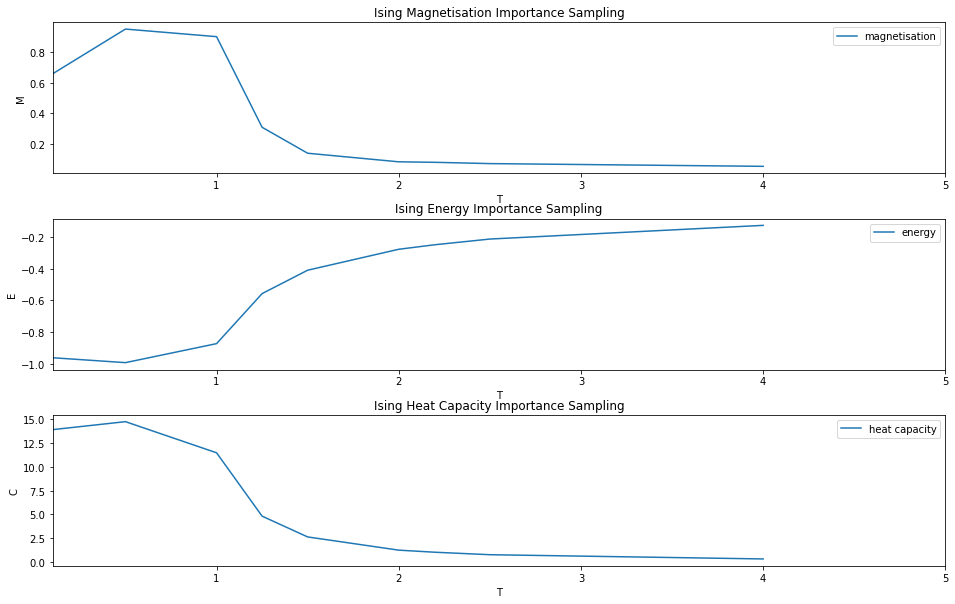

In [19]:
figure(figsize=(16,10))

# subplot magnetisation
subplot(311)
plot(temp,meanM, label="magnetisation")
#plot(tempertatures,meanE/normalization, label="energy")
xlabel("T")
ylabel("M")
xlim(0.1,5)
legend(loc="best")
title("Ising Magnetisation Importance Sampling")

# subplot energy
subplot(312)
plot(temp,meanE, label="energy")
#plot(tempertatures,meanE/normalization, label="energy")
xlabel("T")
ylabel("E")
xlim(0.1,5)
legend(loc="best")
title("Ising Energy Importance Sampling")

# subplot susceptebility
subplot(313)
plot(temp,meanC, label="heat capacity")
#plot(tempertatures,meanE/normalization, label="energy")
xlabel("T")
ylabel("C")
xlim(0.1,5)
legend(loc="best")
title("Ising Heat Capacity Importance Sampling")

# adjust plot spacing
subplots_adjust(hspace=.3)

show()